In [35]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95%}</style>"))

# Setting up the library folder
from importlib import reload
import sys
sys.path.insert(0,'/home/jkumar16/MyModules')

import ExploratoryDataAnalysis as eda

## Variance Inflation Factor
## $VIF_k = \frac{1}{1-R^2_k}$

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

An Example
Let's return to the blood pressure data (bloodpress.txt) in which researchers observed the following data on 20 individuals with high blood pressure:

* blood pressure (y = BP, in mm Hg)
* age (x1 = Age, in years)
* weight (x2 = Weight, in kg)
* body surface area (x3 = BSA, in sq m)
* duration of hypertension (x4 = Dur, in years)
* basal pulse (x5 = Pulse, in beats per minute)
* stress index (x6 = Stress)

In [87]:
df = pd.read_csv('https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/bloodpress/index.txt', sep='\t', index_col=0)
df.to_csv('./data/vif_bloodpress.csv', index=False)
df.head()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
Pt,,,,,,,
1,105,47,85.4,1.75,5.1,63,33
2,115,49,94.2,2.10,3.8,70,14
3,116,49,95.3,1.98,8.2,72,10
4,117,50,94.7,2.01,5.8,73,99
5,112,51,89.4,1.89,7.0,72,95


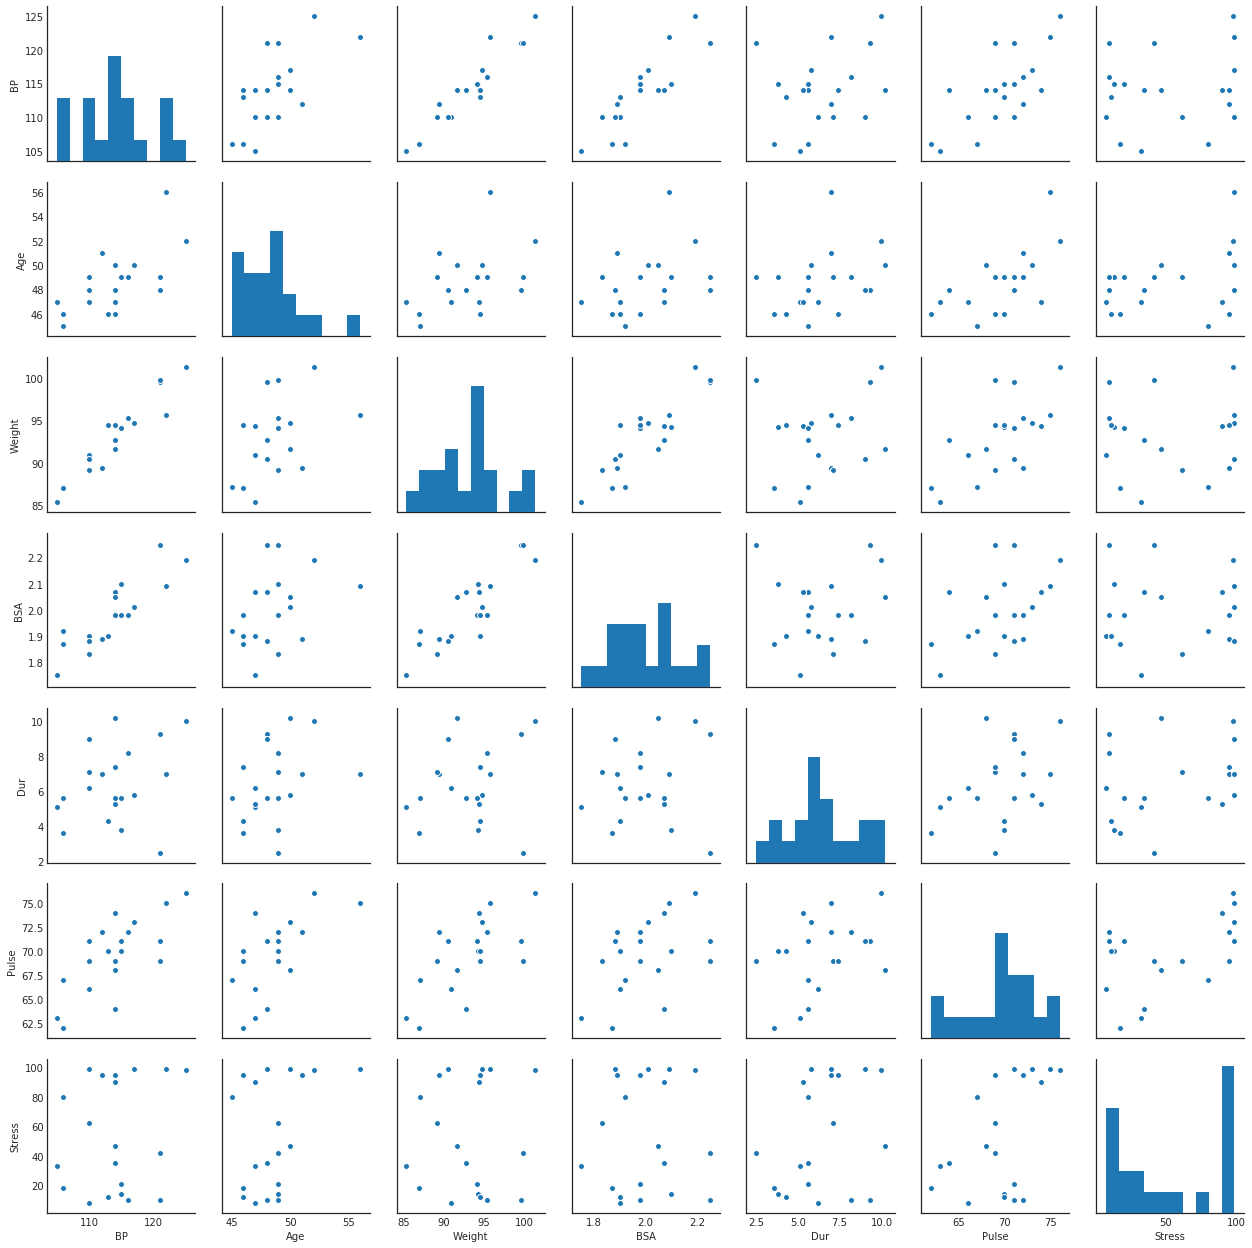

In [99]:
sns.pairplot(df)

### Checking for high correlation

In [89]:
df.corr()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


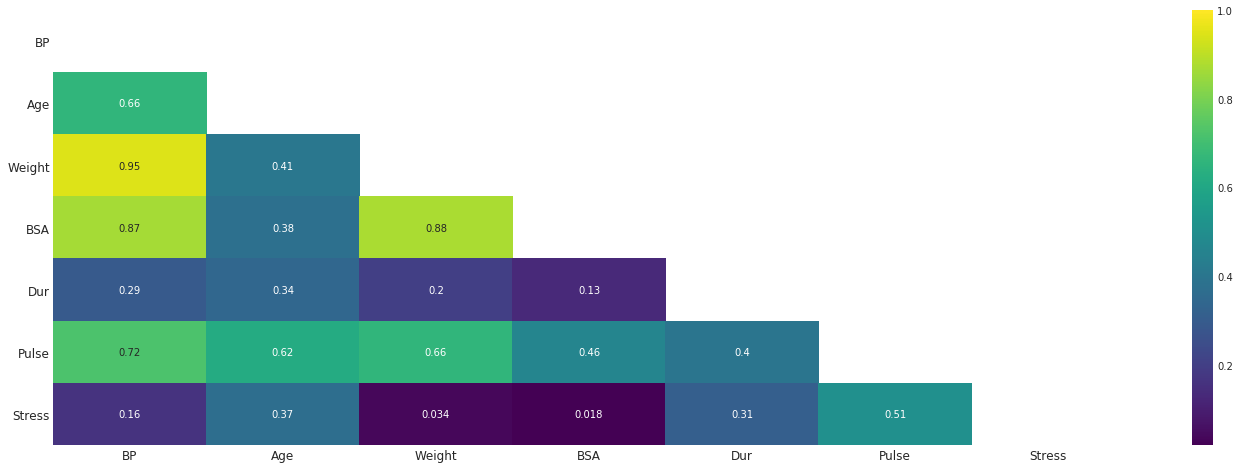

In [110]:
# corr = df.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# plt.figure(figsize=(16,8))
# sns.heatmap(corr, mask=mask, annot=True, fmt='f')
# plt.xticks(fontsize=12)
# plt.yticks(rotation=0, fontsize=12)

reload(eda)
eda.correlation_matrix(df.corr())

Regressing y = BP on all six of the predictors, we obtain:

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = df.drop(['BP'], axis=1)
y = df['BP']

X = sm.add_constant(X)
lin_reg = smf.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     560.6
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           6.40e-15
Time:                        18:49:12   Log-Likelihood:                -6.1033
No. Observations:                  20   AIC:                             26.21
Df Residuals:                      13   BIC:                             33.18
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8705      2.557     -5.034      0.000     -18.394      -7.347
Age            0.7033      0.050     14.177      0.000       0.596       0.810
Weight         0.9699      0.063     15.369      0.000       0.834       1.106
BSA            3.7765      1.580      2.390      0.033       0.363       7.190
Dur            0.0684      0.048      1.412      0.182      -0.036       0.173
Pulse         -0.0845      0.052     -1.637      0.126      -0.196       0.027
Stress         0.0056      0.003      1.633      0.126      -0.002       0.013
==============================================================================
Omnibus:                        7.219   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.643
Skew:                          -1.050   Prob(JB):                       0.0981
Kurtosis:                       4.076   Cond. No.                     4.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,788.307692,const
1,1.762807,Age
2,8.417035,Weight
3,5.328751,BSA
4,1.237309,Dur
5,4.413575,Pulse
6,1.834845,Stress


For the sake of understanding, let's verify the calculation of the VIF for the predictor Weight. Regressing the predictor x2 = Weight on the remaining five predictors:

In [93]:
X = df.drop(['BP', 'Weight'], axis=1)
y = df['Weight']

X = sm.add_constant(X)
lin_reg = smf.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     20.77
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           5.05e-06
Time:                        18:49:26   Log-Likelihood:                -35.712
No. Observations:                  20   AIC:                             83.42
Df Residuals:                      14   BIC:                             89.40
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6744      9.465      2.079      0.057      -0.625      39.974
Age           -0.1446      0.206     -0.700      0.495      -0.588       0.298
BSA           21.4217      3.465      6.183      0.000      13.991      28.852
Dur            0.0087      0.205      0.042      0.967      -0.431       0.449
Pulse          0.5577      0.160      3.489      0.004       0.215       0.901
Stress        -0.0230      0.013     -1.758      0.101      -0.051       0.005
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.445
Skew:                          -0.130   Prob(JB):                        0.800
Kurtosis:                       2.317   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,602.384724,const
1,1.703115,Age
2,1.428349,BSA
3,1.237151,Dur
4,2.360939,Pulse
5,1.502936,Stress


In [98]:
from sklearn.metrics import r2_score
weight_r2 = r2_score(y, lin_reg.predict(X))
weight_vif = 1/(1-weight_r2)
weight_vif

8.4170350296330785

Let's see how the researchers would do. Regressing the response y = BP on the four remaining predictors age, weight, duration and stress, we obtain:

In [112]:
X = df.drop(['BP', 'BSA', 'Pulse'], axis=1)
y = df['BP']

X = sm.add_constant(X)
lin_reg = smf.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     458.3
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.76e-15
Time:                        19:13:59   Log-Likelihood:                -13.562
No. Observations:                  20   AIC:                             37.12
Df Residuals:                      15   BIC:                             42.10
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.8698      3.195     -4.967      0.000     -22.680      -9.059
Age            0.6837      0.061     11.173      0.000       0.553       0.814
Weight         1.0341      0.033     31.652      0.000       0.964       1.104
Dur            0.0399      0.064      0.619      0.545      -0.098       0.177
Stress         0.0022      0.004      0.576      0.573      -0.006       0.010
==============================================================================
Omnibus:                        0.318   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.104
Skew:                          -0.162   Prob(JB):                        0.950
Kurtosis:                       2.860   Cond. No.                     3.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""